https://github.com/minaskar/hankl

In [1]:
import hankl
import numpy as np
import matplotlib.pyplot as plt

# Forward hankl transform
$$g(k)=\int_0^{\infty}f(r)(kr)^qJ_\mu(kr)kdr$$

if $f(r)=r^{\mu+1}\exp(-r^2/2)$, we have

$$g(k)=\int_0^\infty f(r)(kr)^0J_\mu(kr)kdr=k^{\mu+1}\exp(-k^2/2)$$

In [2]:
from basic_fftlog import FFTLog
def f(r, mu=0.0):
    return r**(mu+1.0) * np.exp(-r**2.0 / 2.0)

def g(k, mu=0.0):
    return k**(mu+1.0) * np.exp(- k**2.0 / 2.0)

[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]
[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]
[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]


(1e-05, 10)

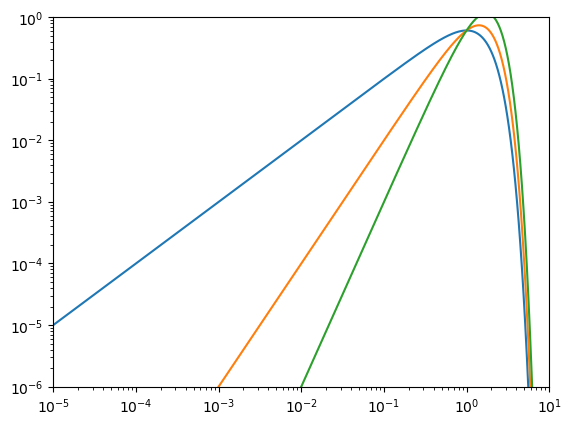

In [9]:
r = np.logspace(-5, 5, 2**10)
mu=[0.,1.,2.,]
for mui in mu:
    k, G = FFTLog(r, f(r, mu=mui), q=0.0, mu=mui)
    #plt.plot(k,G,'--')
    plt.plot(k,g(k,mu=mui))
plt.loglog()
plt.ylim(10**(-6), 1)
plt.xlim(10**(-5), 10)

[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]
[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]
[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]


/var/folders/2x/rv34yy5954lf_chxzn0kbl440000gn/T/ipykernel_3558/3776574353.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(k,np.abs(G/(g(k,mu=mui))-1),'--')
/Users/zhiyulu/Install/anaconda3/lib/python3.11/site-packages/matplotlib/scale.py:255: RuntimeWarning: overflow encountered in power
  return np.power(self.base, values)


(0.0001, 1.0)

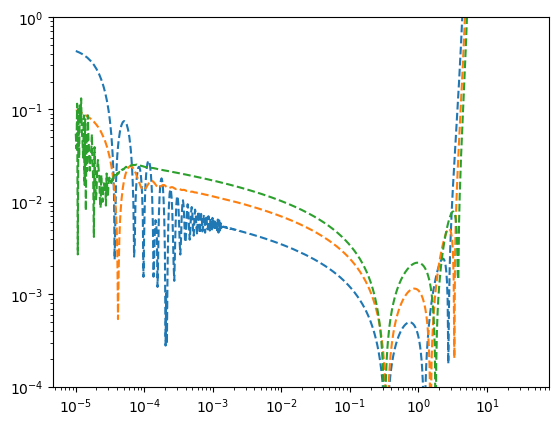

In [4]:
for mui in mu:
    k, G = FFTLog(r, f(r, mu=mui), q=0.0, mu=mui)
    plt.plot(k,np.abs(G/(g(k,mu=mui))-1),'--')
plt.loglog()
plt.ylim(1e-4,1e0)

# Inverse hankl
$$f(r)=\int_0^\infty g(k)(kr)^{-q}J_\mu(kr)rdk$$

for $g(k)=k^{\mu+1}\exp(-k^2/2)$, we have

$$
f(r)=r^{\mu+1}\exp(-r^2/2)
$$

[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]
[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]
[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]


(1e-05, 10)

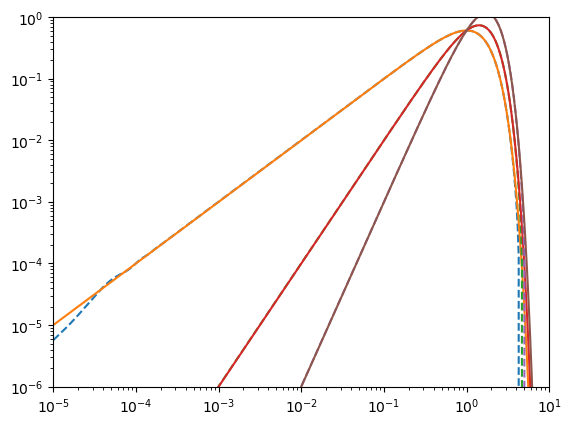

In [5]:
k = np.logspace(-5, 5, 2**10)
mu=[0.,1.,2.,]
for mui in mu:
    r, F = FFTLog(k, g(k, mu=mui), q=-0.0, mu=mui)
    plt.plot(r,F,'--')
    plt.plot(r,f(r,mu=mui))
plt.loglog()
plt.ylim(10**(-6), 1)
plt.xlim(10**(-5), 10)

[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]
[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]
[ 11.51292546  11.4904173   11.46790914 ... -11.46790914 -11.4904173
 -11.51292546]


/var/folders/2x/rv34yy5954lf_chxzn0kbl440000gn/T/ipykernel_3558/2049853099.py:3: RuntimeWarning: divide by zero encountered in divide
  plt.plot(k,np.abs(F/f(r,mu=mui)-1),'--')


(0.0001, 1.0)

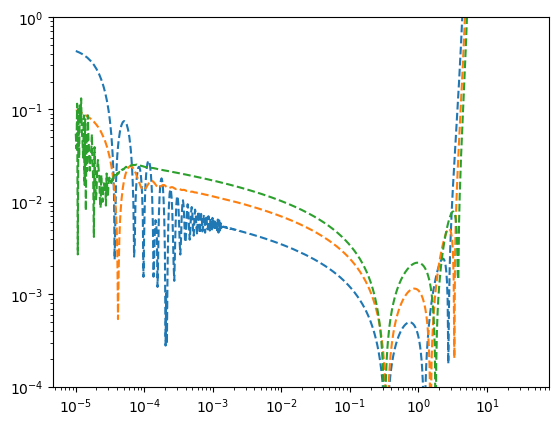

In [6]:
for mui in mu:
    r, F = FFTLog(k, g(k, mu=mui), q=-0.0, mu=mui)
    plt.plot(k,np.abs(F/f(r,mu=mui)-1),'--')
plt.loglog()
plt.ylim(1e-4,1e0)